# Customer Churn Analysis
### Vincent Nasri
#### 10-23-2020

In [1]:
# Use a structured dataset to run a customer churn analysis and develop a model to predict future customers who may churn

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.display import display, HTML

import warnings
warnings.filterwarnings('ignore')

#set notebook to full width
display(HTML('<style>.container { width:100% !important; }</style'))
pd.options.display.max_columns = 100

In [3]:
#import kaggle dataset
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
#Clean and modify data as needed
columns = data.columns.values
# print(data.info)
# print(data.describe)
# print(data.head)

In [5]:
#check dataset for n/a values
print(data.isna().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [6]:
# dropping n/a values from Total Charges as it is only 11
data.dropna(inplace=True)
print(data.isna().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [7]:
# check data types
print(data.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [8]:
# convert TotalCharges to a float type
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors='coerce')
print(data['TotalCharges'].dtypes)

float64


In [9]:
#drop customerID column as it does not add any value to the churn analysis
data.drop(['customerID'],axis=1,inplace=True)

In [10]:
# ------ DATA EXPLORATION ------------- #

In [11]:
# define color palettes and color arrays
sns.set_style('ticks')
colors = ['#307969','#BC754A','#423F83','#BCA04A']
sns.set_palette(sns.color_palette(colors))
# sns.set_palette('Set2')

In [12]:
# describe numerical data
print(data.describe())

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000


In [13]:
# plotting correlations between churn and other variables

#convert catgeorical data to dummy variables in pandas to plot correlations relative to churn
df2 = data.copy()
#convert churn column from (Yes/No) to (1/0)
df2['Churn'].replace(to_replace='Yes',value=1,inplace=True)
df2['Churn'].replace(to_replace='No',value=0,inplace=True)

dummy = pd.get_dummies(df2)
print(dummy.corr()['Churn'])

SeniorCitizen                              0.150889
tenure                                    -0.352229
MonthlyCharges                             0.193356
TotalCharges                              -0.199484
Churn                                      1.000000
gender_Female                              0.008612
gender_Male                               -0.008612
Partner_No                                 0.150448
Partner_Yes                               -0.150448
Dependents_No                              0.164221
Dependents_Yes                            -0.164221
PhoneService_No                           -0.011942
PhoneService_Yes                           0.011942
MultipleLines_No                          -0.032569
MultipleLines_No phone service            -0.011942
MultipleLines_Yes                          0.040102
InternetService_DSL                       -0.124214
InternetService_Fiber optic                0.308020
InternetService_No                        -0.227890
OnlineSecuri

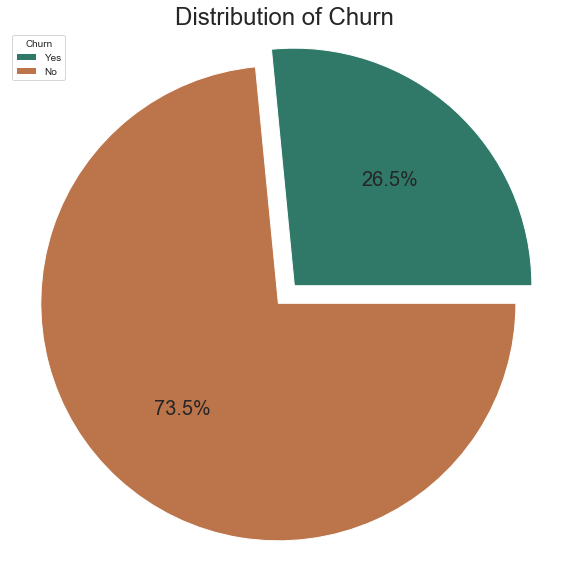

In [14]:
# Plot churn distribution
yes = len(data[data['Churn']=='Yes'])/len(data['Churn'])
no = len(data[data['Churn']=='No'])/len(data['Churn'])
sizes = [yes, no]
    # define pie chart percentage for plotting

f, axs = plt.subplots(1,1,figsize=(8,8))
labels = ['Yes', 'No']
explode = (0, 0.1)
wedges, texts, autotexts = axs.pie(sizes,explode=explode,autopct='%1.1f%%')
axs.axis('equal')
plt.title('Distribution of Churn',fontsize=24)
axs.legend(wedges, labels,title='Churn',loc='upper left')
plt.setp(autotexts,size=20)

f.tight_layout()
plt.savefig('Churn_pie.png',dpi=300)
# We can see that the dataset is skewed towards Non-churn customers which will affect the overall model output result

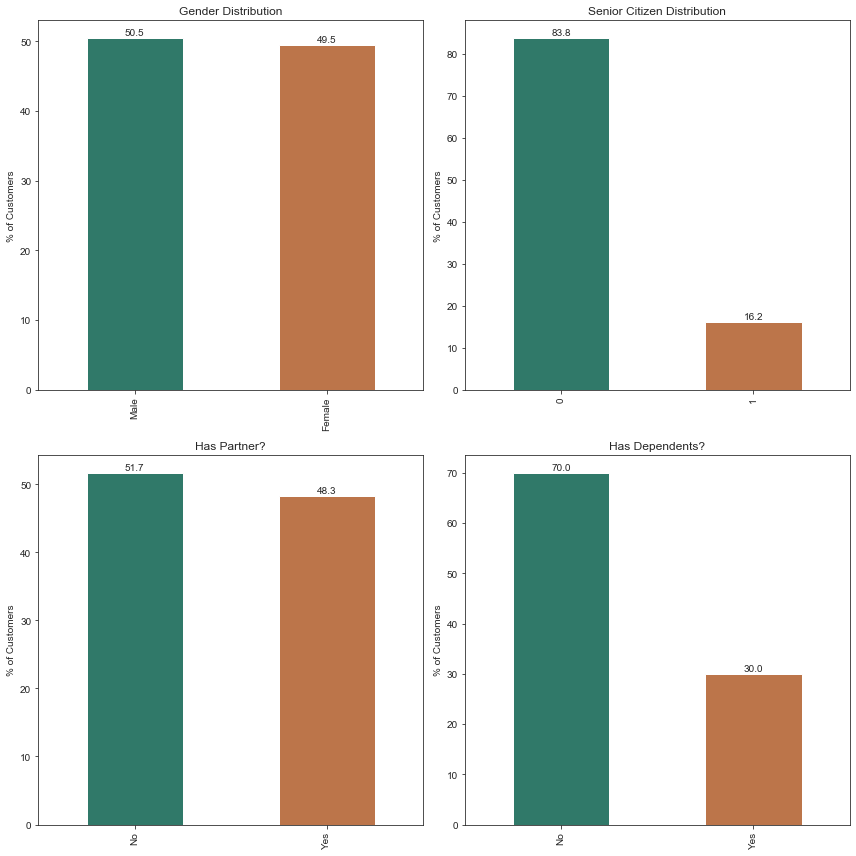

In [15]:
# plotting demographic data
f, axs = plt.subplots(2,2,figsize=(12,12))

#subplot 1: Gender
g = (data['gender'].value_counts()/len(data)*100).plot(kind='bar',ax=axs[0,0],color=colors)
axs[0,0].set_ylabel('% of Customers')
axs[0,0].set_title('Gender Distribution')

#annote subplot with text data
for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')

#subplot 2: Senior Citizen
g = (data['SeniorCitizen'].value_counts()/len(data)*100).plot(kind='bar',ax=axs[0,1],color=colors)
axs[0,1].set_ylabel('% of Customers')
axs[0,1].set_title('Senior Citizen Distribution')

for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')

#subplot 3: Partner Y/N
g = (data['Partner'].value_counts()/len(data)*100).plot(kind='bar',ax=axs[1,0],color=colors)
axs[1,0].set_ylabel('% of Customers')
axs[1,0].set_title('Has Partner?')

for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')

#subplot 4: Dependents Y/N
g = (data['Dependents'].value_counts()/len(data)*100).plot(kind='bar',ax=axs[1,1],color=colors)
axs[1,1].set_ylabel('% of Customers')
axs[1,1].set_title('Has Dependents?')

for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
f.tight_layout()
plt.savefig('Demo_bar.png',dpi=300)

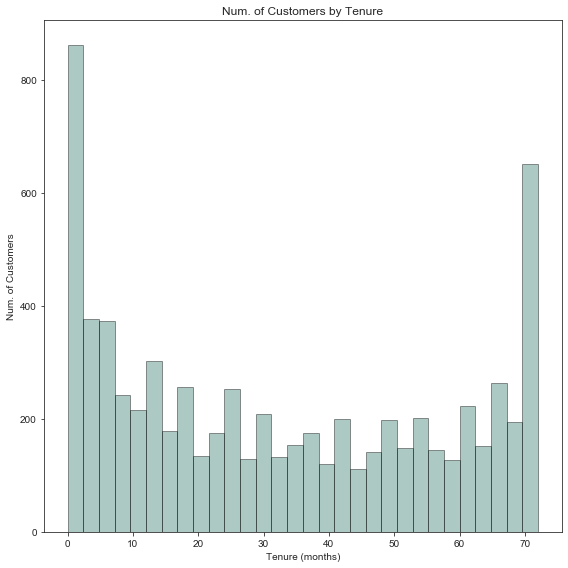

In [16]:
# plot distirbution of customer tenure data
f, axs = plt.subplots(1,1,figsize=(8,8))
ax = sns.distplot(data['tenure'],
    bins = 30,
    hist=True,
    kde=False,
    hist_kws={'edgecolor':'black'},
    kde_kws={'linewidth':4},
    )
ax.set_ylabel('Num. of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Num. of Customers by Tenure')
f.tight_layout()
plt.savefig('Tenure_dist.png',dpi=300)

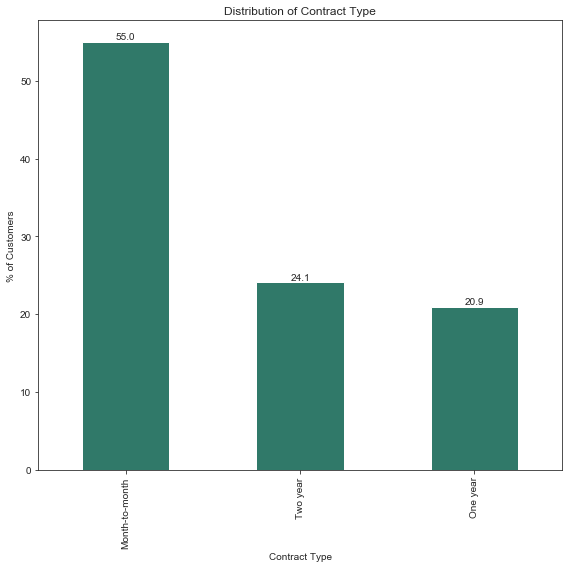

In [17]:
# Plot distribution of contract type
f, axs = plt.subplots(1,1,figsize=(8,8))
g = (data['Contract'].value_counts()*100/len(data['Contract'])).plot(kind='bar',rot=90)
g.set_ylabel('% of Customers')
g.set_xlabel('Contract Type')
g.set_title('Distribution of Contract Type')
for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
f.tight_layout()
plt.savefig('Contract_distr.png',dpi=300)

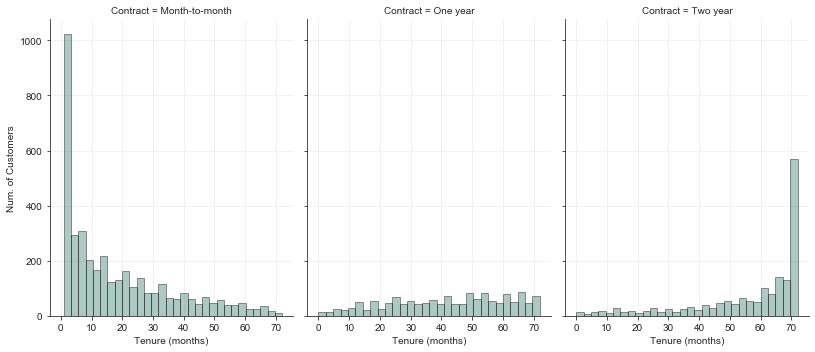

In [18]:
# Plot customer tenure by contract type
g = sns.FacetGrid(data, col='Contract',height=5,aspect=0.75)
g.map(sns.distplot,'tenure',hist_kws={'edgecolor':'black'},
    kde_kws={'linewidth':4},kde=False,hist=True,bins=30)
g.axes[0,0].set_xlabel('Tenure (months)')
g.axes[0,1].set_xlabel('Tenure (months)')
g.axes[0,2].set_xlabel('Tenure (months)')
g.axes[0,0].set_ylabel('Num. of Customers')
g.axes[0,0].grid(alpha=0.3)
g.axes[0,1].grid(alpha=0.3)
g.axes[0,2].grid(alpha=0.3)
plt.savefig('Contract_type_distr.png',dpi=300)

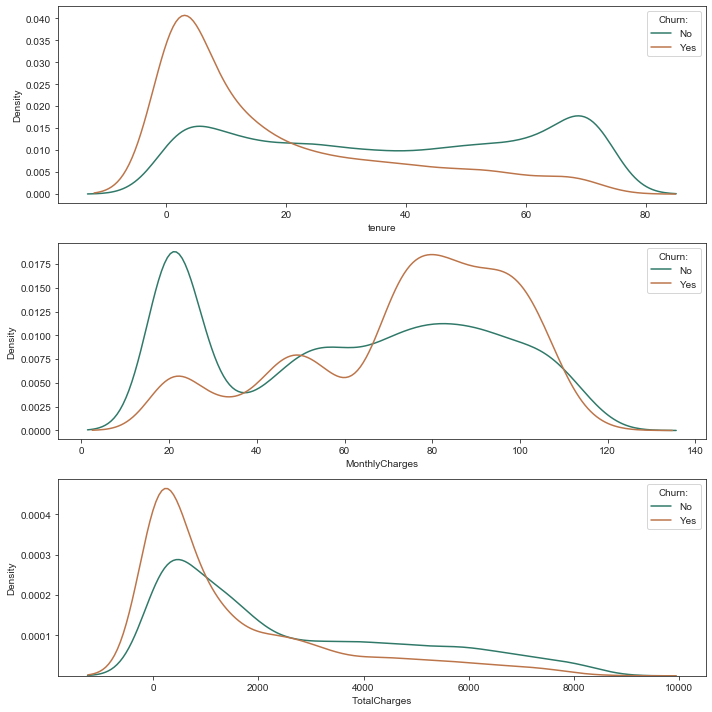

In [19]:
# Plotting kdeplots for total & monthly charges
f, axs = plt.subplots(3,1,figsize=(10,10))

sns.kdeplot(x=data[data['Churn']=='No']['tenure'],ax=axs[0])
sns.kdeplot(x=data[data['Churn']=='Yes']['tenure'],ax=axs[0])

sns.kdeplot(x=data[data['Churn']=='No']['MonthlyCharges'],ax=axs[1])
sns.kdeplot(x=data[data['Churn']=='Yes']['MonthlyCharges'],ax=axs[1])

sns.kdeplot(x=data[data['Churn']=='No']['TotalCharges'],ax=axs[2])
sns.kdeplot(x=data[data['Churn']=='Yes']['TotalCharges'],ax=axs[2])

for ax in axs:
    ax.legend(title='Churn:',labels=['No','Yes'])
plt.tight_layout()
plt.savefig('churn_kde.png',dpi=300)

In [20]:
# Findings:
# Recent customers experience a higher churn rate than long-term customers
# Customers with higher monthly charges are likely to churn

In [21]:
# Explore services offered
services = 'PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies'.split(' ')

Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


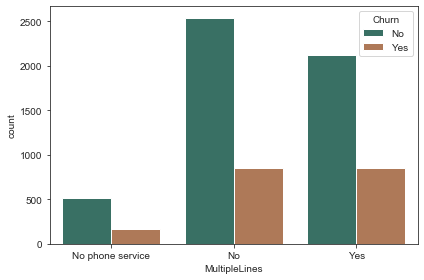

In [22]:
# plot PhoneService data
print(data['PhoneService'].value_counts())
sns.countplot(x=data['MultipleLines'],hue=data['Churn'])
print(data['MultipleLines'].value_counts())
plt.tight_layout()
plt.savefig('Count_MultipleLines.png',dpi=300)

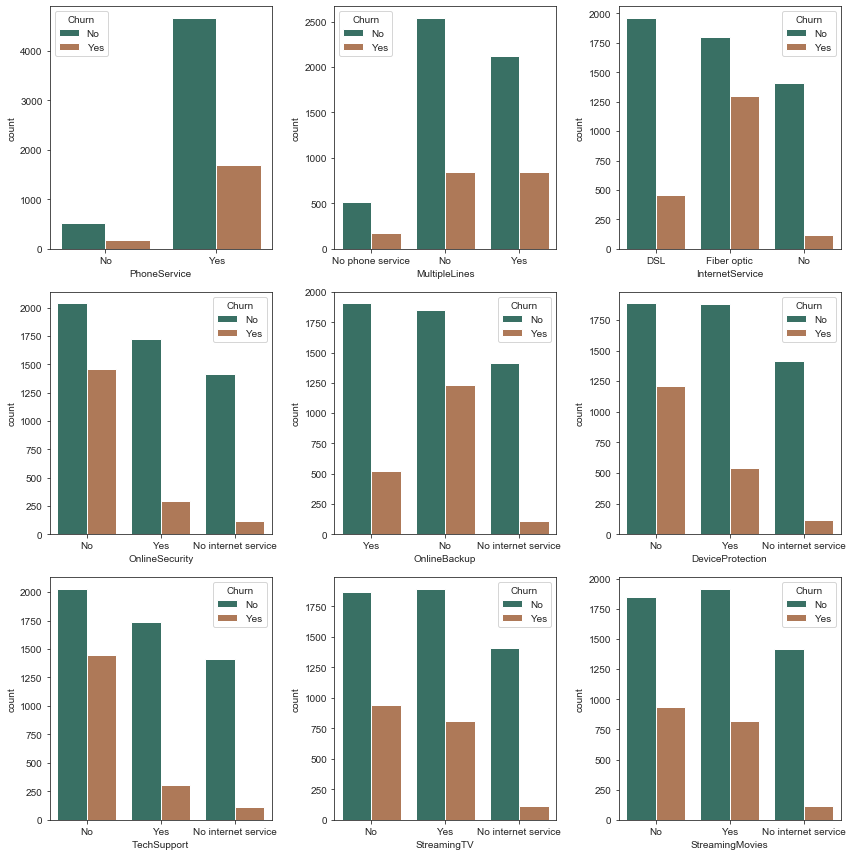

In [23]:
# Plot grid of services to identify variations in churn rate amongst services
f, axs = plt.subplots(3,3,figsize=(12,12))

for i, ax in enumerate(f.axes):
    service = services[i]
    sns.countplot(data[service],hue=data['Churn'],ax=ax)

f.tight_layout()
plt.savefig('Services_count.png',dpi=300)


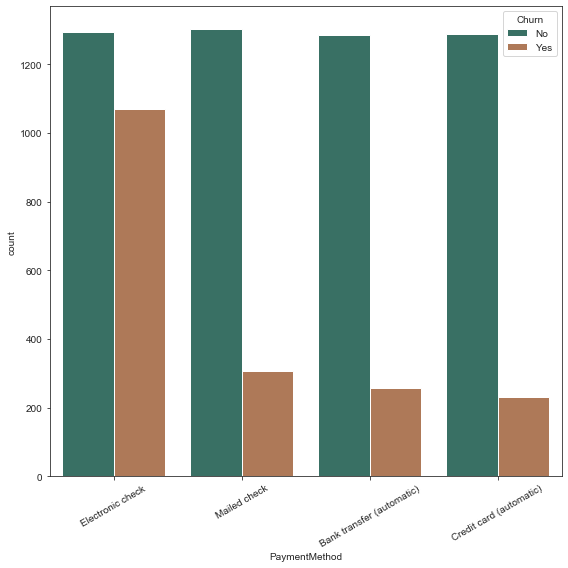

In [24]:
# Plot payment types
plt.figure(figsize=(8,8))
ax = sns.countplot(x=data['PaymentMethod'],hue=data['Churn'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.tight_layout()
plt.savefig('Count_PaymentMethod.png',dpi=300)

['Month-to-month' 'One year' 'Two year']


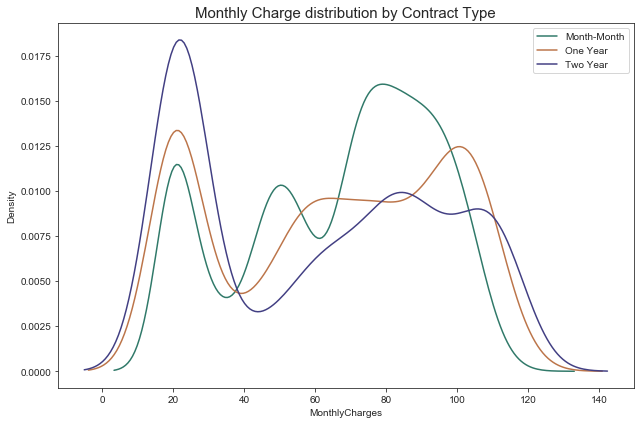

In [25]:
#plot monthly charge by contract type
f = plt.figure(figsize=(9,6))

print(data['Contract'].unique())

sns.kdeplot(x=data[data['Contract']=='Month-to-month']['MonthlyCharges'],label='Month-Month')
sns.kdeplot(x=data[data['Contract']=='One year']['MonthlyCharges'],label='One Year')
sns.kdeplot(x=data[data['Contract']=='Two year']['MonthlyCharges'], label='Two Year')
plt.title("Monthly Charge distribution by Contract Type",fontsize=15)
plt.tight_layout()
plt.legend()
f.savefig('monthlycharge_kde.png',dpi=300)

0       1
1       3
2       3
3       3
4       1
       ..
7038    7
7039    6
7040    1
7041    2
7042    6
Name: Service_Count, Length: 7043, dtype: int64


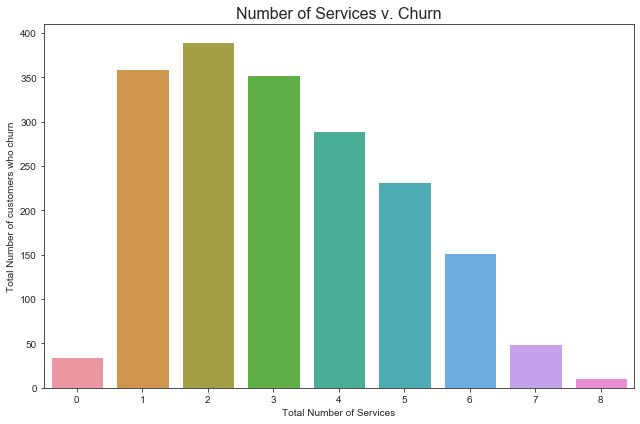

In [26]:
# plot number of services per customer relative to churn rate to see trend

data['Service_Count'] = (data[services]=='Yes').sum(axis=1)
print(data['Service_Count'])

f = plt.figure(figsize=(9,6))
ax = sns.countplot(data[data['Churn']=='Yes']['Service_Count'])
ax.set_xlabel('Total Number of Services')
ax.set_ylabel('Total Number of customers who churn')
plt.title('Number of Services v. Churn', fontsize=16)
plt.tight_layout()
plt.savefig('Service_v_churn.png',dpi=300)

In [27]:
# --- DATA MODEL EVALUATION --------

In [28]:
# This problems is considered a binary classification problem as the output can only be (2) values, "Churn" or "No-Churn" aka (1 or 0)
# We will utilize (3) different ML classifiers and test their accuracy

# Logisitic Regression
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [29]:
# We have already have dummy values for all our categorical data df2 we simply need to drop the Churn column
dummy.dropna(inplace=True)

y = dummy['Churn'].values
X = dummy.drop(columns=['Churn'])

# scale values
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features


In [42]:
# Train, test, fit
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=101)

(unique, counts) = np.unique(y_train, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

# resample training data due to imbalance
import imblearn as imb
oversample = imb.over_sampling.SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

(unique, counts) = np.unique(y_train, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[   0 3429]
 [   1 1282]]
[[   0 3429]
 [   1 3429]]


In [31]:
# Run logisic model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

0.7539853511417492
[[1304  430]
 [ 141  446]]
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1734
           1       0.51      0.76      0.61       587

    accuracy                           0.75      2321
   macro avg       0.71      0.76      0.72      2321
weighted avg       0.80      0.75      0.77      2321



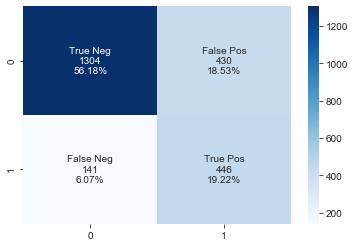

In [32]:
# Prediction accuracy
from sklearn import metrics
predictions = model.predict(X_test)
print(metrics.accuracy_score(y_test,predictions))
print(metrics.confusion_matrix(y_test, predictions))
print(metrics.classification_report(y_test, predictions))

#plot confusion matrix
cmatrix = metrics.confusion_matrix(y_test, predictions)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cmatrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cmatrix.flatten()/np.sum(cmatrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cmatrix, annot=labels, fmt='', cmap='Blues')

In [33]:
# based on the classification report, there are 185 false positives and 261 false negatives
# 0.807 is not the best accuracy either, we will try another ML model

Feature: 0, Score: 0.14712
Feature: 1, Score: -3.55646
Feature: 2, Score: -0.35606
Feature: 3, Score: 1.79104
Feature: 4, Score: 0.00704
Feature: 5, Score: -0.02265
Feature: 6, Score: 0.00603
Feature: 7, Score: -0.02164
Feature: 8, Score: 0.12476
Feature: 9, Score: -0.14037
Feature: 10, Score: 0.11524
Feature: 11, Score: -0.13084
Feature: 12, Score: -0.14984
Feature: 13, Score: 0.11524
Feature: 14, Score: 0.01900
Feature: 15, Score: -0.43427
Feature: 16, Score: 0.53150
Feature: 17, Score: -0.11284
Feature: 18, Score: 0.29284
Feature: 19, Score: -0.11284
Feature: 20, Score: -0.19561
Feature: 21, Score: 0.08649
Feature: 22, Score: -0.11284
Feature: 23, Score: 0.01074
Feature: 24, Score: 0.09585
Feature: 25, Score: -0.11284
Feature: 26, Score: 0.00138
Feature: 27, Score: 0.25458
Feature: 28, Score: -0.11284
Feature: 29, Score: -0.15735
Feature: 30, Score: -0.13035
Feature: 31, Score: -0.11284
Feature: 32, Score: 0.22759
Feature: 33, Score: -0.09575
Feature: 34, Score: -0.11284
Feature: 35

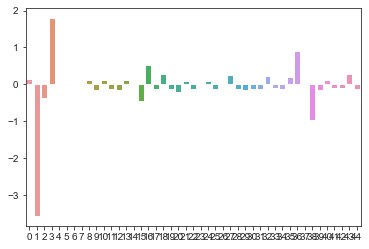

In [34]:
# plot feature importance
importance = model.coef_[0]
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
sns.barplot([x for x in range(len(importance))], importance)

In [35]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
model_rf = RandomForestClassifier(n_estimators=1000,
                                  oob_score=True,
                                  max_depth = 10,
                                  n_jobs=-1,
                                 random_state=50,
                                 max_features="auto",
                                 max_leaf_nodes=30)
model_rf.fit(X_train, y_train)
predictions = model_rf.predict(X_test)
print(metrics.accuracy_score(y_test,predictions))
print(metrics.confusion_matrix(y_test, predictions))
print(metrics.classification_report(y_test, predictions))

0.7919431279620853
[[1420  129]
 [ 310  251]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1549
           1       0.66      0.45      0.53       561

    accuracy                           0.79      2110
   macro avg       0.74      0.68      0.70      2110
weighted avg       0.78      0.79      0.78      2110



In [36]:
# We can try to improve our accuracy by tuning the random forest parameters using GridSearch
from sklearn.model_selection import GridSearchCV

n_estimators = [100,300,500,800,1200]
max_depth = [5,8,15,25,30]

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth)
gridF = GridSearchCV(model_rf, hyperF, cv=3, verbose=1,n_jobs=-1)
bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   36.5s finished


In [37]:
print(bestF.best_params_)

{'max_depth': 8, 'n_estimators': 800}


0.7914691943127962
[[1419  130]
 [ 310  251]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1549
           1       0.66      0.45      0.53       561

    accuracy                           0.79      2110
   macro avg       0.74      0.68      0.70      2110
weighted avg       0.78      0.79      0.78      2110



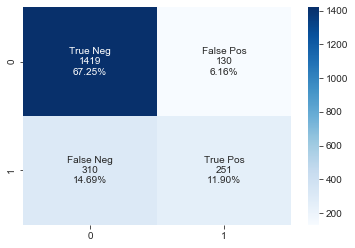

In [38]:
# rerun RandomForest model with optimized parameters
model_rf = RandomForestClassifier(n_estimators=800,
                                  oob_score=True,
                                  max_depth = 8,
                                  n_jobs=-1,
                                 random_state=50,
                                 max_features="auto",
                                 max_leaf_nodes=30)
model_rf.fit(X_train, y_train)
predictions = model_rf.predict(X_test)
print(metrics.accuracy_score(y_test,predictions))
print(metrics.confusion_matrix(y_test, predictions))
print(metrics.classification_report(y_test, predictions))


#plot confusion matrix
cmatrix = metrics.confusion_matrix(y_test, predictions)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cmatrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cmatrix.flatten()/np.sum(cmatrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cmatrix, annot=labels, fmt='', cmap='Blues')

Feature: 0, Score: 0.00509
Feature: 1, Score: 0.14336
Feature: 2, Score: 0.06020
Feature: 3, Score: 0.09108
Feature: 4, Score: 0.00190
Feature: 5, Score: 0.00199
Feature: 6, Score: 0.00218
Feature: 7, Score: 0.00203
Feature: 8, Score: 0.00361
Feature: 9, Score: 0.00356
Feature: 10, Score: 0.00138
Feature: 11, Score: 0.00161
Feature: 12, Score: 0.00254
Feature: 13, Score: 0.00142
Feature: 14, Score: 0.00381
Feature: 15, Score: 0.02647
Feature: 16, Score: 0.07759
Feature: 17, Score: 0.00765
Feature: 18, Score: 0.07095
Feature: 19, Score: 0.00972
Feature: 20, Score: 0.01593
Feature: 21, Score: 0.02054
Feature: 22, Score: 0.00621
Feature: 23, Score: 0.00535
Feature: 24, Score: 0.01332
Feature: 25, Score: 0.00619
Feature: 26, Score: 0.00262
Feature: 27, Score: 0.07115
Feature: 28, Score: 0.00776
Feature: 29, Score: 0.01653
Feature: 30, Score: 0.00301
Feature: 31, Score: 0.00753
Feature: 32, Score: 0.00412
Feature: 33, Score: 0.00345
Feature: 34, Score: 0.00825
Feature: 35, Score: 0.00440
Fe

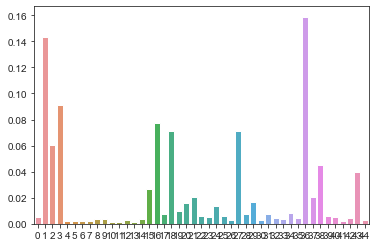

In [39]:
# plot feature importance
importance = model_rf.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
sns.barplot([x for x in range(len(importance))], importance)

0.7914691943127962
[[1371  178]
 [ 262  299]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1549
           1       0.63      0.53      0.58       561

    accuracy                           0.79      2110
   macro avg       0.73      0.71      0.72      2110
weighted avg       0.78      0.79      0.79      2110



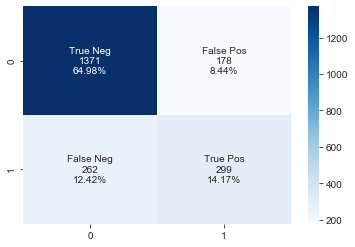

In [40]:
# Support Vector Machines
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.3,
                                                   random_state=42)
model.svm = SVC(kernel='linear')
model.svm.fit(X_train, y_train)
predictions = model.svm.predict(X_test)
print(metrics.accuracy_score(y_test,predictions))
print(metrics.confusion_matrix(y_test, predictions))
print(metrics.classification_report(y_test, predictions))

#plot confusion matrix
cmatrix = metrics.confusion_matrix(y_test, predictions)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cmatrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cmatrix.flatten()/np.sum(cmatrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cmatrix, annot=labels, fmt='', cmap='Blues')